# Steerable wavelets

This notebook is an attemp to create a sterrable complex wavelet similar to the one described by [Karasaridis & Simoncelli (1996)](https://www.computer.org/csdl/proceedings/icassp/1996/3192/04/00547763.pdf) and [Portilla & Simoncelli (2000)](https://link.springer.com/article/10.1023/A:1026553619983). This class of continuous wavelets, directly constructed in the Fourier space, allows us a better reconstruction of the signal.

However, from my experience, it has a reduced number of possible scales for the decomposition compared to the Morlet wavelet. It is not sure that this wavelet would have a real advantage for the segmentation method.

### One dimensional construction

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We first split the Fourier with two filters, a low-pass filter, which corresponds to the usual "Scaling function" of a wavelet set, and a high-pass filter.

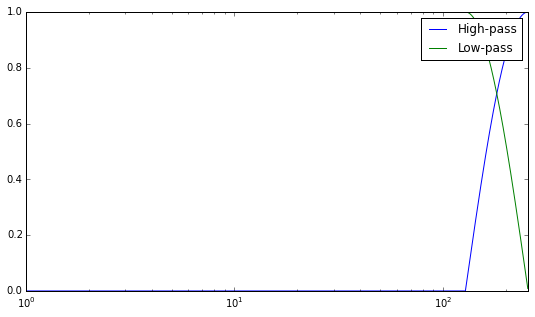

In [13]:
#Size of the array
na = 512
max = np.pi/2.

rt = np.arange(na)
rt = (rt-np.fix(na/2.))
r = (rt*max)/(na/2.)

#First division (1D) Low- and high-pass filters
#-----------------------------------------

H0 = np.zeros(na)
L0 = np.zeros(na)

#Condition A
#-------------------
ca = where((r > np.pi/4) & (r < np.pi/2))

H0[ca] = np.cos(np.pi/2. * np.log(2. * r[ca] / np.pi)/np.log(2.))
L0[ca] = 2.*np.cos(np.pi/2. * np.log(4. * r[ca] / np.pi)/np.log(2.))

#Condition B
#-------------------
cb = where(r <= np.pi/4)

H0[cb] = 0.
L0[cb] = 2.

#Condition C
#-------------------
cc=where(r >= np.pi/2)

H0[cc] = 1.
L0[cc] = 0.

figure(figsize(9,5))
plot(rt,H0, label="High-pass")
plot(rt, L0/2., label="Low-pass")
plt.xscale('log')
plt.xlim([1e0,na/2.])
plt.legend()

Now, we can divide the high-pass filter to create *sub*-bandpass filters

In [ ]:
#Number of iterations
Nite = 5

#Iterative division (1D)
#-----------------------------------------
Hi=np.zeros(Nite,na)
Li=np.zeros(Nite,na)

for ite=0 in range(Nite):

    nwrange=np.where(Li[ite-1,*] == 2.)

    r = (rt*max)/rt[nwrange[nwcount-1]]

;Condition A
;-------------------

ca=where(r gt !pi/4 and r lt !pi/2)

Hi[ite,ca] = cos( !pi/2. * alog(2. * r[ca] / !pi)/alog(2.) )

Li[ite,ca] = 2.*cos( !pi/2. * alog(4. * r[ca] / !pi)/alog(2.) )

;Condition B
;-------------------

cb=where(r le !pi/4)

Hi[ite,cb] = 0.

Li[ite,cb] = 2.

;Condition C
;-------------------

cc=where(r ge !pi/2)

Hi[ite,cc] = 1.

Li[ite,cc] = 0.

;Negative frequencies
;-------------------

;pos=where(rt gt 0.,cpos)
;neg=where(rt lt 0.,cneg)

;Hi[ite,neg[1:cneg-1]]=reverse(Hi[ite,pos])
;Li[ite,neg[1:cneg-1]]=reverse(Li[ite,pos])

;Plot (1D)
;-----------------------------------------
load_color_vp

wset,0

oplot,rt,Hi[ite,*],color=4
oplot,rt,Li[ite,*]/2.

;wset,1

;int = H0^2 + (L0/2.)^2.*((L1/2.)^2.+H1^2.)

;plot,rt,int,xrange=[-na/2,na/2],yrange=[0,1.5],xstyle=1
;oplot,[!pi/4.,!pi/4.],[0,2.5],linestyle=2
;oplot,[!pi/2.,!pi/2.],[0,2.5],linestyle=2

endfor